In [2]:
import pandas as pd
import sqlite3 as sql
import datetime as dt
import uuid
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr

1. score metrics

ERD
game_dim
game_reports
player_dim
game_rankings (game_uuid, player_id, rank)
current_scores_view

In [147]:
games_df = pd.read_csv('game_reports_cumulative.csv', parse_dates=[2,3])
games_df['players'] = games_df['players'].apply(lambda x: x.split(" "))
games_df['player_count'] = games_df['players'].apply(lambda x: len(x))
games_df['game_length'] = games_df['game_end'] - games_df['game_start']
games_df['game_length_minutes'] = games_df['game_length'].dt.total_seconds()/60

player_games_df = games_df.explode('players')
player_games_df['place'] = player_games_df.groupby(['game_played', 'game_start'])['players'].expanding().count().values

C:\Users\skylar\AppData\Local\Temp\ipykernel_11252\846478159.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  games_df = pd.read_csv('game_reports_cumulative.csv', parse_dates=[2,3])
C:\Users\skylar\AppData\Local\Temp\ipykernel_11252\846478159.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  games_df = pd.read_csv('game_reports_cumulative.csv', parse_dates=[2,3])


In [148]:
games_df['game_end'] - games_df['game_start']

0    0 days 00:36:00
1    0 days 01:55:00
2    0 days 01:00:00
3    0 days 00:30:00
4    0 days 01:30:00
5    0 days 03:10:00
6    0 days 00:30:00
7    0 days 03:53:00
8    0 days 01:00:00
9    0 days 02:18:00
10   0 days 00:30:00
11   0 days 00:30:00
12   0 days 01:30:00
13   0 days 01:43:00
14   0 days 00:22:00
15   0 days 02:20:00
16   0 days 01:30:00
17   0 days 01:27:00
18   0 days 01:42:00
19   0 days 00:49:00
20   0 days 02:53:00
21   0 days 00:36:00
22   0 days 01:07:00
23   0 days 01:05:00
24   0 days 01:50:00
25   0 days 01:30:00
26   0 days 00:12:00
27   0 days 00:24:00
28   0 days 00:16:00
29   0 days 00:30:00
30   0 days 01:03:00
31   0 days 00:40:00
32   0 days 00:31:00
33   0 days 01:15:00
34   0 days 01:01:00
dtype: timedelta64[ns]

In [149]:
player_games_df

,game_played,players,game_start,game_end,player_count,game_length,game_length_minutes,place
0,Revolution,Scoggins,2024-07-18 09:40:00,2024-07-18 10:16:00,3,0 days 00:36:00,36.0,1.0
0,Revolution,Zack,2024-07-18 09:40:00,2024-07-18 10:16:00,3,0 days 00:36:00,36.0,2.0
0,Revolution,Max,2024-07-18 09:40:00,2024-07-18 10:16:00,3,0 days 00:36:00,36.0,3.0
1,Quacks,Celeste,2024-07-18 09:45:00,2024-07-18 11:40:00,4,0 days 01:55:00,115.0,4.0
1,Quacks,Brenna,2024-07-18 09:45:00,2024-07-18 11:40:00,4,0 days 01:55:00,115.0,5.0
...,...,...,...,...,...,...,...,...
33,Quacks3,Lindsey,2024-07-18 17:45:00,2024-07-18 19:00:00,5,0 days 01:15:00,75.0,6.0
34,Clank2,Karson,2024-07-18 17:59:00,2024-07-18 19:00:00,4,0 days 01:01:00,61.0,1.0
34,Clank2,Rachel,2024-07-18 17:59:00,2024-07-18 19:00:00,4,0 days 01:01:00,61.0,2.0
34,Clank2,John,2024-07-18 17:59:00,2024-07-18 19:00:00,4,0 days 01:01:00,61.0,3.0


In [150]:
player_games_df.groupby(['game_played', 'game_start'], sort=False)['players'].expanding().count()

game_played  game_start             
Revolution   2024-07-18 09:40:00  0     1.0
                                  0     2.0
                                  0     3.0
Quacks       2024-07-18 09:45:00  1     1.0
                                  1     2.0
                                       ... 
Quacks3      2024-07-18 17:45:00  33    5.0
Clank2       2024-07-18 17:59:00  34    1.0
                                  34    2.0
                                  34    3.0
                                  34    4.0
Name: players, Length: 116, dtype: float64

In [151]:
player_games_df.groupby('players').sum('game_length_minutes')

,player_count,game_length_minutes,place
players,,,
Brenna,29,656.0,25.0
Caitlin,8,250.0,4.0
Camilla,6,124.0,3.0
Celeste,8,175.0,8.0
Dane,10,178.0,9.0
Hamen,6,145.0,10.0
J,10,371.0,5.0
Jesse,4,90.0,2.0
John,42,784.0,26.0


In [152]:
games_df = pd.read_csv('game_reports_cumulative.csv', parse_dates=[2,3])
games_df['players'] = games_df['players'].apply(lambda x: x.split(" "))
games_df['player_count'] = games_df['players'].apply(lambda x: len(x))
games_df['game_length'] = games_df['game_end'] - games_df['game_start']
games_df['game_length_minutes'] = games_df['game_length'].dt.total_seconds()/60

player_games_df = games_df.explode('players')
player_games_df['place'] = player_games_df.groupby(['game_played', 'game_start'], sort=False)['players'].expanding().count().values
#t * (1+((1-p)/(2n-2))) where t = time, p = place order, and n = # of players
t = player_games_df['game_length_minutes']
p = player_games_df['place']
n = player_games_df['player_count']
player_games_df['score'] = np.round(t * (1+((1-p)/(2*n-2))))
player_games_df


C:\Users\skylar\AppData\Local\Temp\ipykernel_11252\4149899179.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  games_df = pd.read_csv('game_reports_cumulative.csv', parse_dates=[2,3])
C:\Users\skylar\AppData\Local\Temp\ipykernel_11252\4149899179.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  games_df = pd.read_csv('game_reports_cumulative.csv', parse_dates=[2,3])


,game_played,players,game_start,game_end,player_count,game_length,game_length_minutes,place,score
0,Revolution,Scoggins,2024-07-18 09:40:00,2024-07-18 10:16:00,3,0 days 00:36:00,36.0,1.0,36.0
0,Revolution,Zack,2024-07-18 09:40:00,2024-07-18 10:16:00,3,0 days 00:36:00,36.0,2.0,27.0
0,Revolution,Max,2024-07-18 09:40:00,2024-07-18 10:16:00,3,0 days 00:36:00,36.0,3.0,18.0
1,Quacks,Celeste,2024-07-18 09:45:00,2024-07-18 11:40:00,4,0 days 01:55:00,115.0,1.0,115.0
1,Quacks,Brenna,2024-07-18 09:45:00,2024-07-18 11:40:00,4,0 days 01:55:00,115.0,2.0,96.0
...,...,...,...,...,...,...,...,...,...
33,Quacks3,Lindsey,2024-07-18 17:45:00,2024-07-18 19:00:00,5,0 days 01:15:00,75.0,5.0,38.0
34,Clank2,Karson,2024-07-18 17:59:00,2024-07-18 19:00:00,4,0 days 01:01:00,61.0,1.0,61.0
34,Clank2,Rachel,2024-07-18 17:59:00,2024-07-18 19:00:00,4,0 days 01:01:00,61.0,2.0,51.0
34,Clank2,John,2024-07-18 17:59:00,2024-07-18 19:00:00,4,0 days 01:01:00,61.0,3.0,41.0


In [153]:
ax = player_games_df.groupby('players')['game_length_minutes','score'].sum().sort_values(by='score', ascending=False).plot(kind='scatter',x='game_length_minutes', y='score', figsize=(15, 8))
ax.plot(x,model.predict(x.reshape(-1,1)))

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [154]:
player_games_df.groupby('players')['score'].sum()

players
Brenna      408.0
Caitlin     172.0
Camilla      63.0
Celeste     155.0
Dane        166.0
Hamen        88.0
J           277.0
Jesse        45.0
John        537.0
Jules       242.0
Karson      383.0
Les         421.0
Lindsey     158.0
Matt         45.0
Max         779.0
Meghann     116.0
Paul        566.0
Preston     526.0
Rachel      463.0
Reed         52.0
Scoggins    111.0
Skylar      618.0
Toph        387.0
Zack        683.0
Name: score, dtype: float64

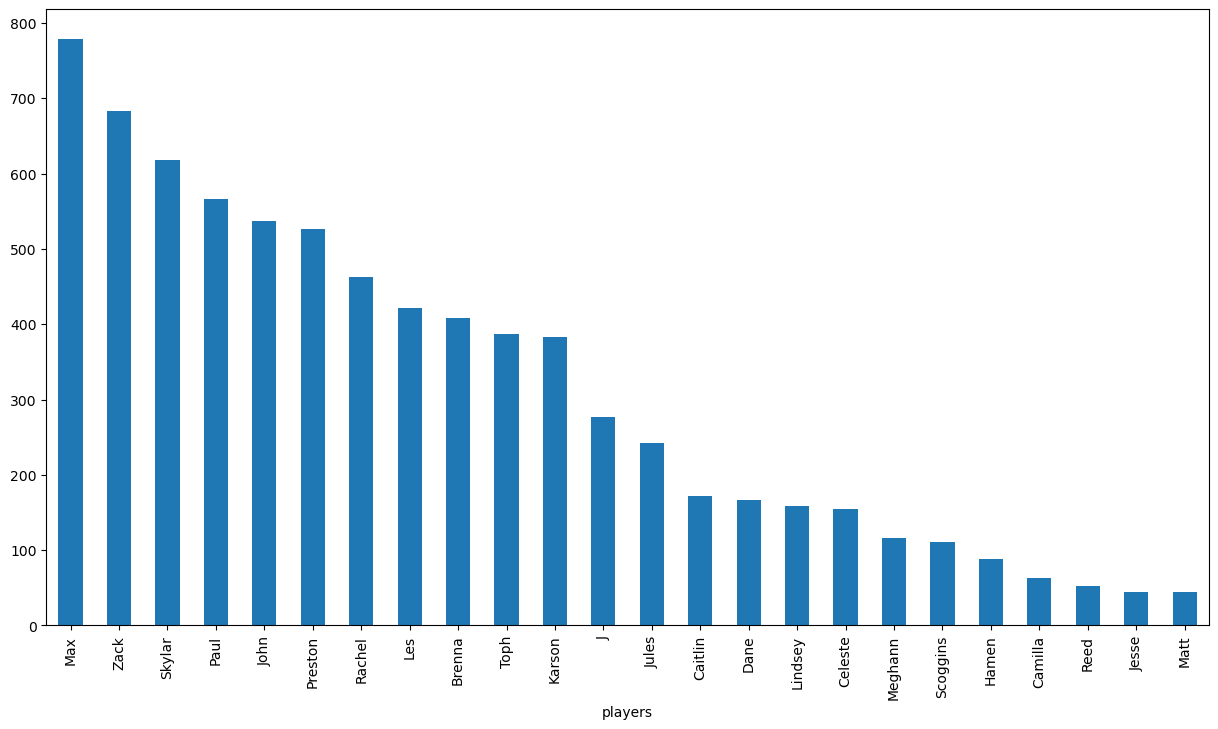

In [155]:
ranking = player_games_df.groupby('players')['score'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15, 8))

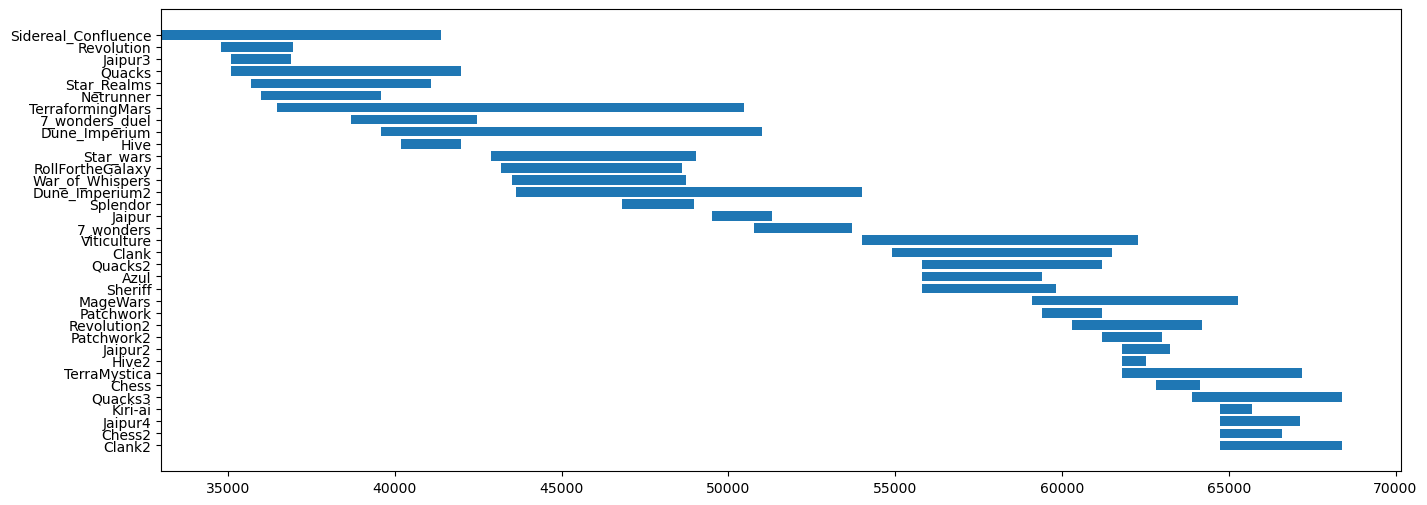

In [156]:
fig, ax = plt.subplots(1, figsize=(16,6))
gantt = games_df.sort_values(by='game_start', ascending=False)
ax.barh(gantt['game_played'], (gantt['game_end']-gantt['game_start']).dt.total_seconds(),left=gantt['game_start'].dt.hour*60*60+gantt['game_start'].dt.minute*60)
plt.show()

In [13]:
len(y-model.predict(x.reshape(-1,1)))

NameError: name 'y' is not defined

In [14]:
x = player_games_df.groupby('players')[['game_length_minutes','score']].sum().sort_values(by='score', ascending=False).values[:,0]
y = player_games_df.groupby('players')[['game_length_minutes','score']].sum().sort_values(by='score', ascending=False).values[:,1]
model = lr()
model.fit(x.reshape(-1,1),y)
pd.DataFrame(np.arange(0,18),y-model.predict(x.reshape(-1,1)))

ValueError: Shape of passed values is (18, 1), indices imply (15, 1)

<Axes: xlabel='0', ylabel='1'>

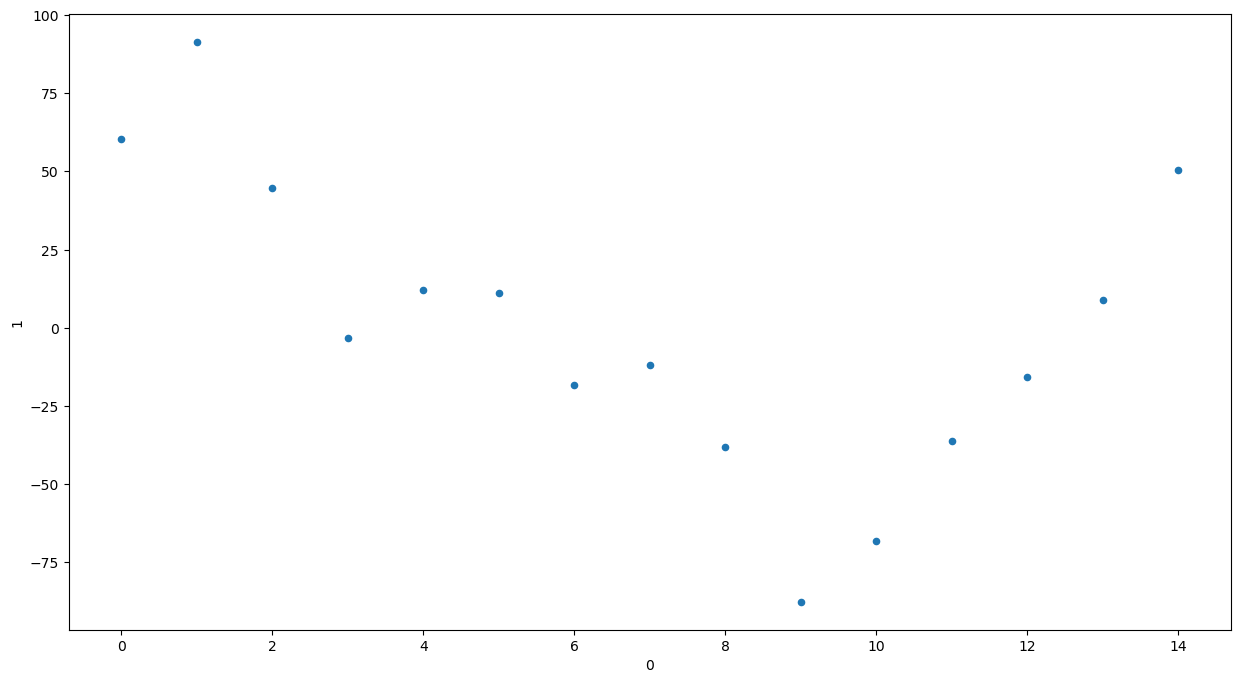

In [15]:
pd.DataFrame((np.arange(0,18),y-model.predict(x.reshape(-1,1)))).T.plot(kind='scatter',x=0, y=1, figsize=(15,8))

In [16]:
import scipy.stats as st
rng = np.random.default_rng()
st.kstest(y-model.predict(x.reshape(-1,1)),
             st.norm.cdf)

KstestResult(statistic=0.532523341827272, pvalue=0.00016883285052087435, statistic_location=-3.152284587331735, statistic_sign=1)

(array([1., 1., 2., 1., 3., 3., 0., 2., 1., 1.]),
 array([-87.59663177, -69.68928959, -51.78194741, -33.87460523,
        -15.96726305,   1.94007913,  19.84742131,  37.75476349,
         55.66210567,  73.56944785,  91.47679003]),
 <BarContainer object of 10 artists>)

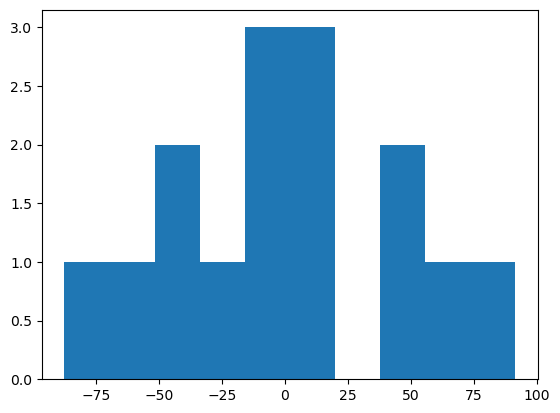

In [17]:
plt.hist(y-model.predict(x.reshape(-1,1)))

In [18]:
x = player_games_df.groupby('players')[['game_length_minutes','score']].sum().sort_values(by='score', ascending=False).values[:,0]

In [19]:
game = ('Dune Imperium', ('Les', 'Zack', 'Paul', 'Skylar'), '2022/12/1 13:00:00', '2022/12/1 15:25:00')
game_uuid = str(uuid.uuid4())
game_list = [(game_uuid, game[0], place, player, game[2], game[3]) for place, player in enumerate(game[1])]

In [20]:
pd.DataFrame(game_list, columns=['game_id', 'game_played', 'player', 'place_order', 'game_start', 'game_end'])

,game_id,game_played,player,place_order,game_start,game_end
0,b11d4e2c-7e80-47f3-b2ae-dbc0a1aebcdb,Dune Imperium,0,Les,2022/12/1 13:00:00,2022/12/1 15:25:00
1,b11d4e2c-7e80-47f3-b2ae-dbc0a1aebcdb,Dune Imperium,1,Zack,2022/12/1 13:00:00,2022/12/1 15:25:00
2,b11d4e2c-7e80-47f3-b2ae-dbc0a1aebcdb,Dune Imperium,2,Paul,2022/12/1 13:00:00,2022/12/1 15:25:00
3,b11d4e2c-7e80-47f3-b2ae-dbc0a1aebcdb,Dune Imperium,3,Skylar,2022/12/1 13:00:00,2022/12/1 15:25:00


In [7]:
con = sql.connect("tutorial.db")

In [8]:
cur = con.cursor()

In [9]:
cur.execute("CREATE TABLE game_reports(game_id, game_played, player, place_order, game_start, game_end)")

OperationalError: table game_reports already exists

In [10]:
res = cur.execute("select * from sqlite_master")

In [11]:
res.fetchall()

[('table',
  'game_reports',
  'game_reports',
  3,
  'CREATE TABLE game_reports(game_id, game_played, player, place_order, game_start, game_end)')]

In [43]:
game1 = pd.DataFrame(game_list, columns=['game_id', 'game_played', 'player', 'place_order', 'game_start', 'game_end'])

In [52]:
game1.to_sql('game_reports', con, if_exists='append', index=False, method='multi')

4

In [53]:
res = cur.execute("select * from game_reports")
res.fetchall()

[('e17eb5f1-f941-455a-b21a-7a9fb06fce81',
  'Dune Imperium',
  0,
  'Les',
  '2022/12/1 13:00:00',
  '2022/12/1 15:25:00'),
 ('e17eb5f1-f941-455a-b21a-7a9fb06fce81',
  'Dune Imperium',
  1,
  'Zack',
  '2022/12/1 13:00:00',
  '2022/12/1 15:25:00'),
 ('e17eb5f1-f941-455a-b21a-7a9fb06fce81',
  'Dune Imperium',
  2,
  'Paul',
  '2022/12/1 13:00:00',
  '2022/12/1 15:25:00'),
 ('e17eb5f1-f941-455a-b21a-7a9fb06fce81',
  'Dune Imperium',
  3,
  'Skylar',
  '2022/12/1 13:00:00',
  '2022/12/1 15:25:00')]

In [223]:
pd.set_option('display.max_rows', 1000)

In [158]:
from openskill.models import PlackettLuce

model = PlackettLuce()

In [160]:
games_df

,game_played,players,game_start,game_end,player_count,game_length,game_length_minutes
0,Revolution,"[Scoggins, Zack, Max]",2024-07-18 09:40:00,2024-07-18 10:16:00,3,0 days 00:36:00,36.0
1,Quacks,"[Celeste, Brenna, John, Hamen]",2024-07-18 09:45:00,2024-07-18 11:40:00,4,0 days 01:55:00,115.0
2,Netrunner,"[Skylar, Preston]",2024-07-18 10:00:00,2024-07-18 11:00:00,2,0 days 01:00:00,60.0
3,Hive,"[Preston, Scoggins]",2024-07-18 11:10:00,2024-07-18 11:40:00,2,0 days 00:30:00,30.0
4,RollFortheGalaxy,"[Preston, John, Scoggins, Jesse]",2024-07-18 12:00:00,2024-07-18 13:30:00,4,0 days 01:30:00,90.0
5,Dune_Imperium,"[Zack, Max, Caitlin, Skylar]",2024-07-18 11:00:00,2024-07-18 14:10:00,4,0 days 03:10:00,190.0
6,Jaipur,"[Hamen, Brenna]",2024-07-18 13:45:00,2024-07-18 14:15:00,2,0 days 00:30:00,30.0
7,TerraformingMars,"[Paul, J, Les, Meghann]",2024-07-18 10:08:00,2024-07-18 14:01:00,4,0 days 03:53:00,233.0
8,Azul,"[Max, Brenna, Celeste, Paul]",2024-07-18 15:30:00,2024-07-18 16:30:00,4,0 days 01:00:00,60.0
9,Viticulture,"[Dane, Skylar, Preston, Zack, J, John]",2024-07-18 15:00:00,2024-07-18 17:18:00,6,0 days 02:18:00,138.0


In [164]:
player_rankings = {player:model.rating(name=player) for player in games_df['players'].explode().drop_duplicates().tolist()}

In [165]:
new_list = []
for game in games_df['players'].to_list():
    match = [(lambda x: [x])(ranking) for ranking in [player_rankings.get(key) for key in game]]
    results = model.rate(match)
    print(player_rankings)

{'Scoggins': PlackettLuceRating(mu=27.869048680749426, sigma=8.205243377397993), 'Zack': PlackettLuceRating(mu=25.717262170187357, sigma=8.058224222802378), 'Max': PlackettLuceRating(mu=21.413689149063217, sigma=8.058224222802378), 'Celeste': PlackettLuceRating(mu=25.0, sigma=8.333333333333334), 'Brenna': PlackettLuceRating(mu=25.0, sigma=8.333333333333334), 'John': PlackettLuceRating(mu=25.0, sigma=8.333333333333334), 'Hamen': PlackettLuceRating(mu=25.0, sigma=8.333333333333334), 'Skylar': PlackettLuceRating(mu=25.0, sigma=8.333333333333334), 'Preston': PlackettLuceRating(mu=25.0, sigma=8.333333333333334), 'Jesse': PlackettLuceRating(mu=25.0, sigma=8.333333333333334), 'Caitlin': PlackettLuceRating(mu=25.0, sigma=8.333333333333334), 'Paul': PlackettLuceRating(mu=25.0, sigma=8.333333333333334), 'J': PlackettLuceRating(mu=25.0, sigma=8.333333333333334), 'Les': PlackettLuceRating(mu=25.0, sigma=8.333333333333334), 'Meghann': PlackettLuceRating(mu=25.0, sigma=8.333333333333334), 'Dane': Pl

In [202]:
[(player, round(rating.mu,2), round(rating.sigma,2)) for player, rating in sorted(player_rankings.items(), key=lambda x:x[1].mu, reverse=True)]

[('Max', 37.36, 7.31),
 ('Toph', 33.01, 7.62),
 ('Rachel', 32.74, 7.77),
 ('Zack', 32.24, 6.45),
 ('Karson', 32.0, 7.59),
 ('Dane', 27.95, 7.75),
 ('Celeste', 27.27, 8.0),
 ('Skylar', 26.45, 7.1),
 ('Caitlin', 25.24, 7.6),
 ('J', 25.22, 7.98),
 ('Matt', 24.56, 7.8),
 ('Scoggins', 24.46, 7.73),
 ('Hamen', 24.03, 7.84),
 ('Paul', 24.02, 7.16),
 ('Preston', 23.73, 6.9),
 ('Reed', 22.3, 8.06),
 ('John', 22.16, 6.98),
 ('Meghann', 20.96, 8.08),
 ('Jesse', 20.82, 8.06),
 ('Les', 20.53, 7.24),
 ('Lindsey', 20.15, 7.62),
 ('Camilla', 18.85, 7.51),
 ('Brenna', 16.89, 6.93),
 ('Jules', 15.25, 7.37)]

In [222]:
model.predict_draw([[player_rankings['Rachel']], [player_rankings['Max']]])

0.4771087726179505